In [37]:
# Importations
from pymatgen.ext.matproj import MPRester
from jupyter_jsmol.pymatgen import quick_view
from pymatgen.electronic_structure import bandstructure
from pymatgen.electronic_structure import plotter
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [38]:
# ma clé personnelle et mon matériau
mp_key = "W8CQwCBdr2wTPWJ30EYXBEMHt65P5TIk"
mp_id = "mp-31454"

# Utilisation de la classe MPRester pour se connecter à la base de données des matériaux de Materials Project
with MPRester(mp_key) as m:
    band_structure = m.get_bandstructure_by_material_id(mp_id)

Retrieving ElectronicStructureDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

# Visualisation

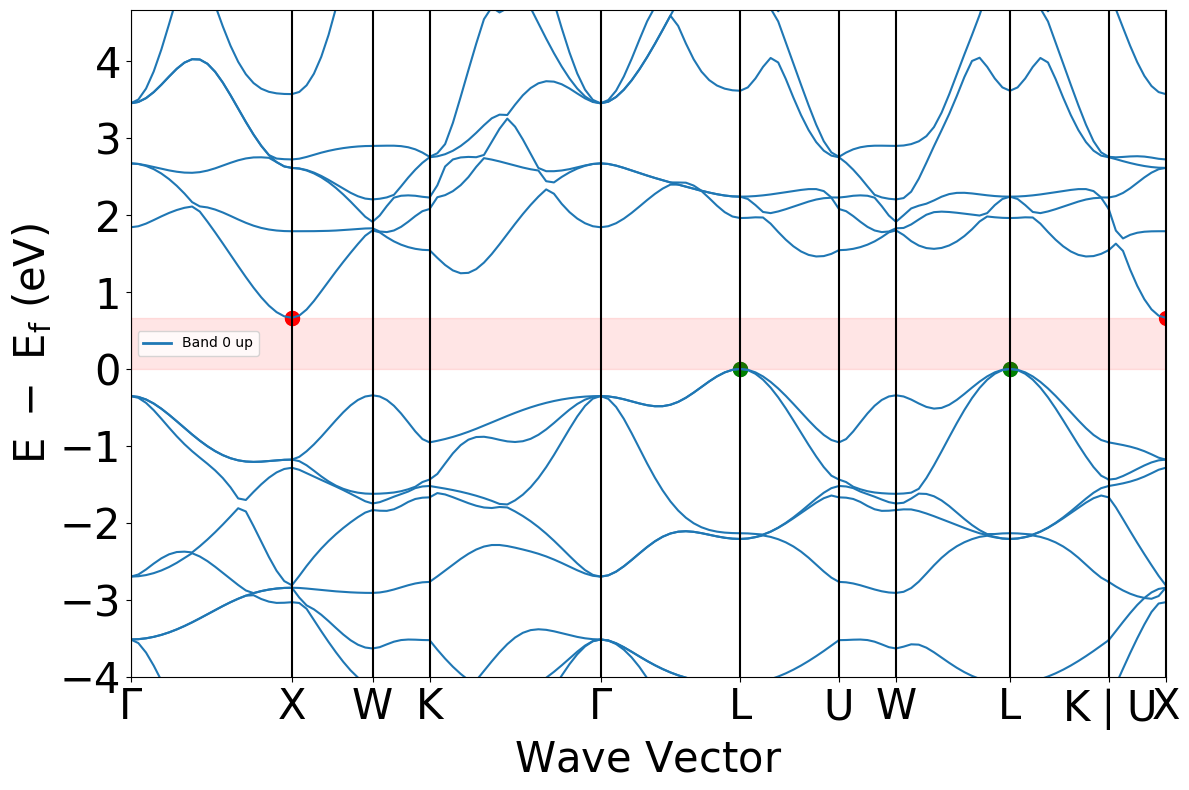

In [52]:
# plot pour la visualisation des bandes de structures électroniques
plot = BSPlotter(band_structure)

# Extraction des données de tracé pour la structure électronique
data = plot.bs_plot_data()

# Récupération des distances entre les points du tracé (abscisses)
distance = data.get('ticks').get('distance')

# Affichage du tracé des bandes électroniques avec des marqueurs pour les VBM et CBM (Valence Band Maximum et Conduction Band Minimum)
plot.get_plot(vbm_cbm_marker=True)

# Affichage de la bande interdite
plt.fill_between(np.linspace(distance[0], distance[-1], 2), 0, energy,  color='red', alpha=0.1)

Commentaires : 
- Les points verts sont des VBM (Valence Band Maximum) alors que les points rouges sont les CBM (Conduction Band Minimum)
- On peut observer une bande interdite indirecte de largeur 0.7 eV à l'oeil et de vecteur de transition associé L-X

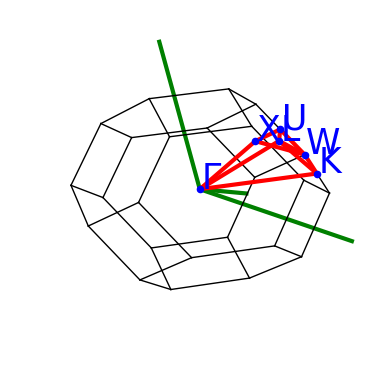

In [53]:
# Visualisation de la première zone de Brillouin
BSPlotter(band_structure).plot_brillouin();

# Description détaillée de la bande interdite

In [54]:
# Obtention de la bande interdite à partir de la structure de bande
gap = band_structure.get_band_gap()

# Énergie de la bande interdite
energy = gap.get('energy')
print('Energie de la bande :', energy, 'eV. \n')

# Vérification si la bande interdite est directe ou indirecte en fonction de la visualisation précédente
if gap.get('direct') == False:
    print('La bande interdite est indirecte. \n')
else:
    print('La bande interdite est directe. \n')

# Affichage des bornes de la bande interdite
print('Bornes : La bande interdite se situe entre 0 eV et ', energy, ' eV. sur le diagramme.\n')

# Affichage du vecteur de transition associé à la bande interdite
print("Vecteur de transition :", gap['transition'],'\n')

# métal, semi-conducteur ou pas
m = data.get('is_metal')
print("Est-ce un métal ? ", m)
print("Ce n'est pas un métal car la largeur de la bande interdite n'est pas nulle et ce n'est pas non plus un semi-conducteur car celle-ci est indirecte. ")

Energie de la bande : 0.665 eV. 

La bande interdite est indirecte. 

Bornes : La bande interdite se situe entre 0 eV et  0.665  eV. sur le diagramme.

Vecteur de transition : L-X 

Est-ce un métal ?  False
Ce n'est pas un métal car la largeur de la bande interdite n'est pas nulle et ce n'est pas non plus un semi-conducteur car celle-ci est indirecte. 


# Dernière bande de valence

In [69]:
# Détermination de l'énergie de référence (E_0)
E_0 = data.get('zero_energy')
print("Ef = {} eV".format(E_0),'(énergie de Fermi pris comme référence) \n')

# Détermination de la dernière bande de valence (VBM)
vbm = band_structure.get_vbm()
E_vbm = vbm['energy']
kpoint_vbm = vbm['kpoint'].cart_coords

# Affichage des résultats liés à la bande de valence
print('Energie du maximum de la bande de valence = {} eV'.format(E_vbm))
print('sur le graphe : E-Ef = ', (E_vbm - E_0),'\n')
print('Vecteur k en coordonnées cartésiennes =', kpoint_vbm,'\n')

# Affichage des indices de bande associés aux VBM
band_index = vbm.get('band_index')
# Formater manuellement la sortie pour une meilleure lisibilité
formatted_output = "Band Index:\n"
for spin, indices in band_index.items():
    formatted_output += f"Spin: {spin.name}\n"
    formatted_output += f"Indices: {indices}\n"
print(formatted_output)

Ef = 7.2236 eV (énergie de Fermi pris comme référence) 

Energie du maximum de la bande de valence = 7.2236 eV
sur le graphe : E-Ef =  0.0 

Vecteur k en coordonnées cartésiennes = [0.50723798 0.50723798 0.50723798] 

Band Index:
Spin: up
Indices: [13, 14]



Commentaire : Les bandes 13 et 14 contiennent la plus grande énergie de la bande de valence. Ces deux extremums correspondent aux points verts sur le graphe ci-dessus.

# Première bande de conduction

In [70]:
# Détermination de la première bande de conduction (CBM)

# Obtention du minimum de la bande de conduction (CBM - Conduction Band Minimum)
cbm = band_structure.get_cbm()
# Récupération de l'énergie associée au CBM
E_cbm = cbm['energy']
# Récupération des coordonnées cartésiennes du point K associé au CBM
kpoint_cbm = cbm['kpoint'].cart_coords

# Affichage des résultats liés à la bande de conduction
print('Energie du minimum de la bande de conduction =', E_cbm, 'eV')
print('sur le graphe : E-Ef =', (E_cbm - E_0), '\n')
print('Vecteur k (coordonnées cartésiennes) =', kpoint_cbm, '\n')

# Affichage des indices de bande associés aux CBM
band_index = cbm.get('band_index')
# Formater manuellement la sortie pour une meilleure lisibilité
formatted_output = "Band Index:\n"
for spin, indices in band_index.items():
    formatted_output += f"Spin: {spin.name}\n"
    formatted_output += f"Indices: {indices}\n"
print(formatted_output)

Energie du minimum de la bande de conduction = 7.8886 eV
sur le graphe : E-Ef = 0.665 

Vecteur k (coordonnées cartésiennes) = [0.         1.01447597 0.        ] 

Band Index:
Spin: up
Indices: [15]



Commentaire : La 15ème bande contient la plus basse énergie de la bande de conduction (correspondant au point rouge du diagramme de bande).

# Dispersion

La dispersion se produit dans un milieu dispersif où les différentes fréquences de l'onde ne se propagent plus à la même vitesse. Cette variation de vitesse dépend de la variation d'énergie du vecteur d'onde k. En analysant les pentes des courbes énergétiques par rapport au vecteur d'onde k, nous pouvons déterminer les pentes maximales et minimales de chaque branche de bande. Une pente maximale indique une dispersion maximale, tandis qu'une pente minimale indique une dispersion minimale.

In [73]:
# contient les distances utiles du tableau 'distance' pour la suite
x = np.array([distance[0], distance[1], distance[3], distance[5], distance[7], distance[9], distance[11], distance[13], distance[15], distance[17], distance[18]])
y = data.get('energy')

# Initialisation des tableaux pour stocker les différences entre les points successifs
dx = np.zeros(10)
dyc = np.zeros(10)
dyv = np.zeros(10)
mc = np.zeros(10)
mv = np.zeros(10)

# Calcul des différences entre les points successifs dans le tableau x
for i in range(10):
    dx[i] = x[i + 1] - x[i]

# Calcul des variations de la bande de valence (dyv) et de la bande de conduction (dyc)
for i in range(10):
    dyv[i] = y.get('1')[i][14][-1] - y.get('1')[i][14][0]
    dyc[i] = y.get('1')[i][15][-1] - y.get('1')[i][15][0]

# Calcul des pentes (dispersions) pour la bande de valence (mv) et la bande de conduction (mc)
for i in range(10):
    mv[i] = dyv[i] / dx[i]
    mc[i] = dyc[i] / dx[i]
    
# Affichage des dispersions maximales et minimales en valeur absolue
print("En valeur absolue:")
mxV = np.max(abs(mv))
print("Plus grande dispersion pour la bande de valence: ", mxV)
mxC = np.max(abs(mc))
print("Plus grande dispersion pour la bande de conduction: ", mxC)
mnV = np.min(abs(mv))
print("Plus faible dispersion pour la bande de valence: ", mnV)
mnC = np.min(abs(mc))
print("Plus faible dispersion pour la bande de conduction: ", mnC)

En valeur absolue:
Plus grande dispersion pour la bande de valence:  1.7049030661923876
Plus grande dispersion pour la bande de conduction:  2.4498746104059737
Plus faible dispersion pour la bande de valence:  0.40099619201289677
Plus faible dispersion pour la bande de conduction:  0.13658683804015878


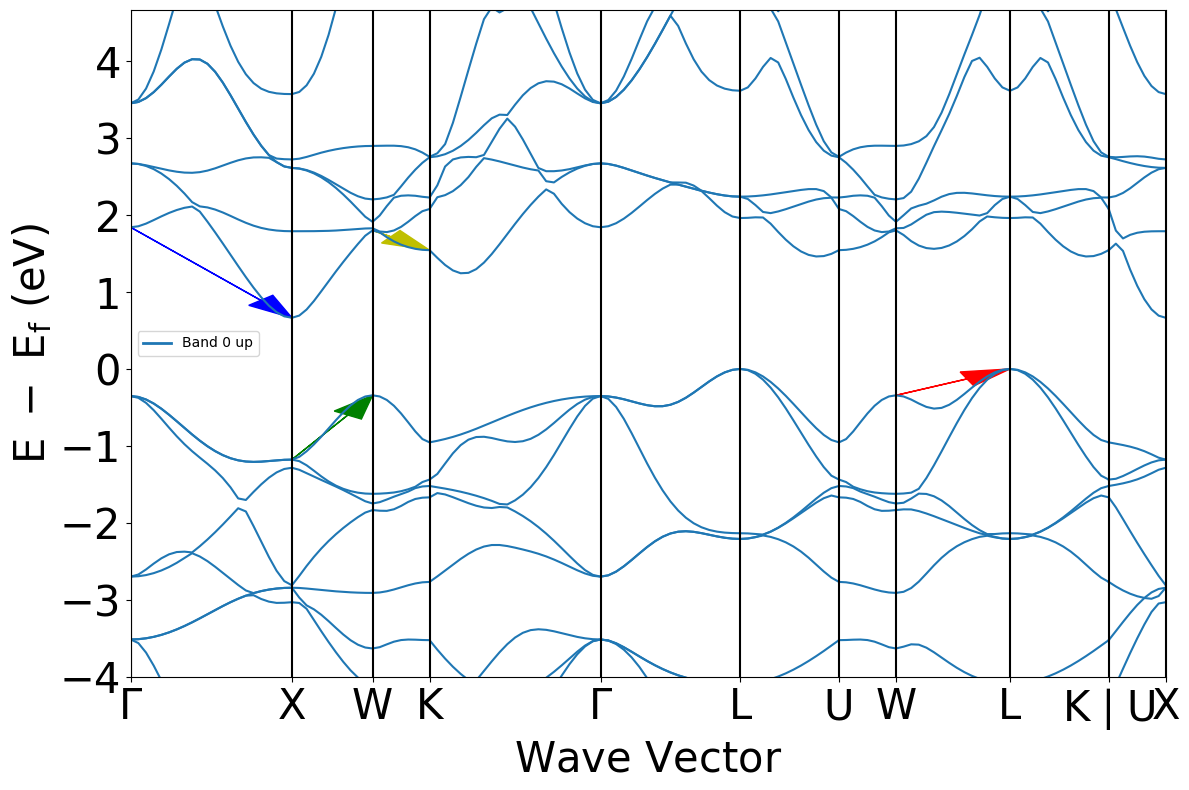

In [83]:
# visualisation
BSPlotter(band_structure).get_plot()
plt.arrow(x[7], (y.get('1')[7][14])[0], dx[7], dyv[7], color = 'r', head_width = 0.2,length_includes_head=True)
plt.arrow(x[1], (y.get('1')[1][14])[0], dx[1], dyv[1], color = 'g', head_width = 0.2,length_includes_head=True)
plt.arrow(x[0], (y.get('1')[0][15])[0], dx[0], dyc[0], color = 'b', head_width = 0.2,length_includes_head=True)
plt.arrow(x[2], (y.get('1')[2][15])[0], dx[2], dyc[2], color = 'y', head_width = 0.2,length_includes_head=True)

plt.show()

## Commentaires :
1) Dernière bande de valence (bande 14) :
- La plus grande dispersion pour la dernière bande de valence a lieu sur: X-W. Elle vaut 1.7049030661923876 et est représentée par une flèche verte.
- La plus faible dispersion pour la dernière bande de valence a lieu sur: W-L. Elle vaut 0.40099619201289677 et est représentée par une flèche rouge.

2) Première bande de conduction (bande 14) :
- La plus grande dispersion pour la première bande de conduction a lieu sur: Gamma-X. Elle vaut  2.4498746104059737 et est représentée par une flèche bleue.
- La plus faible dispersion pour la dernière bande de conduction a lieu sur: W-K. Elle vaut 0.13658683804015878 et est représentée par une flèche jaune.

# Masse effective au sommet de la dernière bande de valence

On suppose une dispersion parabolique. La formule s'écrit donc $m* = \hbar^2 k^2/ 2 E(k)$ .

In [81]:
# Constantes physiques
hbarre = 6.62607015e-34 / (2 * np.pi)  # J/s
eV = 1.6022e-19  # J
A = 1e-10  # m

# Récupération des coordonnées fractionnaires du sommet de la dernière bande de valence
Valence_k = band_structure.get_vbm()['kpoint'].frac_coords

# Récupération de l'énergie au sommet de la dernière bande de valence
Valence_energy = band_structure.get_vbm()['energy']

# Calcul de la masse effective pour la bande de valence
Valence_masse = (hbarre**2 * (Valence_k[0]**2 + Valence_k[1]**2 + Valence_k[2]**2)) / (2 * Valence_energy * eV * A**2)

# Affichage du résultat
print("La masse effective au sommet de la dernière bande de valence est de", Valence_masse, "kg\n")


La masse effective au sommet de la dernière bande de valence est de 3.6034057992049003e-31 kg



# Masse effective à la base de la première bande de conduction

In [82]:
# Récupération des coordonnées fractionnaires à la base de la première bande de conduction
Cond_k = band_structure.get_cbm()['kpoint'].frac_coords

# Récupération de l'énergie à la base de la première bande de conduction
Cond_energy = band_structure.get_cbm()['energy']

# Calcul de la masse effective pour la bande de conduction
Cond_masse = (hbarre**2 * (Cond_k[0]**2 + Cond_k[1]**2 + Cond_k[2]**2)) / (2 * Cond_energy * eV * A**2)

# Affichage du résultat
print("La masse effective à la base de la première bande de conduction est de", Cond_masse, "kg\n")

La masse effective à la base de la première bande de conduction est de 2.199761861516325e-31 kg

